In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,UpSampling2D,Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
import numpy as np

import os
import random
import pickle
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator


print(os.listdir("/content/gdrive/My Drive/breast-20200512T051500Z-001/breast_data"))

['normal', 'cancer']


In [ ]:
IMG_SIZE = 128

In [ ]:
CATEGORIES = ['cancer', 'normal']
dataset = []

def generate_data():
    for category in CATEGORIES:
        path = f'/content/gdrive/My Drive/breast-20200512T051500Z-001/breast_data/{category}'
        class_id = CATEGORIES.index(category)
        for image in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_COLOR)
                image_array = cv2.resize(image_array, (IMG_SIZE,IMG_SIZE))
                dataset.append([image_array, class_id])
            except Exception as e:
                print(e)
    random.shuffle(dataset)
                
generate_data()

In [ ]:
print(len(dataset))

178


In [ ]:
data = []
labels = []
for features, label in dataset:
    data.append(features)
    labels.append(label)

In [ ]:
import tensorflow as tf
data = np.array(data)
data.reshape(-1,128,3)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
from sklearn.model_selection import train_test_split
data = data/255
train_x,data,train_y,labels =train_test_split(data,labels,test_size=0.5)
test_data, validation_data, test_labels, validation_labels = train_test_split(data,labels,test_size=0.5)

In [ ]:
train_x = train_x/ 255
#train_x.resize(142,128,128,3)
#train_x.shape
#data.shape
data.shape
#validation_data.shape
#print(len(train_x))
#print(len())

(89, 128, 128, 3)

In [ ]:
input_layer=Input(shape= (128,128,3))

In [ ]:
#encoder part
encode_layer1 = Dense(1500, activation= 'relu')(input_layer)
encode_layer2 = Dense(1000, activation= 'relu')(encode_layer1)
encode_layer3 = Dense(500, activation= 'relu')(encode_layer2)
output_1 = Dense(3)(encode_layer3)
model1= Model(input_layer,output_1)
model1.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
dense (Dense)                (None, 128, 128, 1500)    6000      
_________________________________________________________________
dense_1 (Dense)              (None, 128, 128, 1000)    1501000   
_________________________________________________________________
dense_2 (Dense)              (None, 128, 128, 500)     500500    
_________________________________________________________________
dense_3 (Dense)              (None, 128, 128, 3)       1503      
Total params: 2,009,003
Trainable params: 2,009,003
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2 = Sequential([
      
       Dense(3, activation = 'relu', input_shape=(IMG_SIZE,IMG_SIZE,3)) ,
       Dense(16,activation='relu'),
       Dropout(0.2),
       Dense(32, activation='relu'),
       Dense(32, activation='sigmoid'),
       Dropout(0.5),
       Dense(3, activation='softmax')
])


In [ ]:

model2.compile(optimizer='ADAM', loss='binary_crossentropy')
#model2.add(BatchNormalization())

In [ ]:
model2.summary()
print(output_1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128, 128, 3)       12        
_________________________________________________________________
dense_5 (Dense)              (None, 128, 128, 16)      64        
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 16)      0         
_________________________________________________________________
dense_6 (Dense)              (None, 128, 128, 32)      544       
_________________________________________________________________
dense_7 (Dense)              (None, 128, 128, 32)      1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
dense_8 (Dense)              (None, 128, 128, 3)       9

In [ ]:
from tensorflow.keras.layers import *
print(output_1.shape)
print(model2.output.shape)
merged = concatenate([output_1,model2.output])

(None, 128, 128, 3)
(None, 128, 128, 3)


In [ ]:
merged = Flatten()(merged)    
#merged = Dense(256, activation='relu')(merged)
#merged = Dropout(.5)(merged)
merged = Dense(128, activation='relu')(merged)
#merged = Dropout(.35)(merged)

# output layer
merged = Dense(5, activation='softmax')(merged)

In [ ]:
output = Dense(3, activation='sigmoid')(merged)


In [ ]:
newModel = Model([model1.input,model2.input],output)


In [ ]:

newModel.compile(metrics=['acc'], loss='mse',optimizer ='adam')

#newModel.compile(optimizer='adam', loss = 'mean_squared_error', metrics = ('mae'))
newModel.summary()

#newModel.summary()
#early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=5,verbose=1, mode='auto')
#history1 = newModel.fit([train_x,data],train_y,batch_size=batch_size,epochs=epochs,verbose=1)

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
dense_4_input (InputLayer)      [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 128, 128, 3)  12          dense_4_input[0][0]              
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 128, 128, 16) 64          dense_4[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
_______________________________________________________________________________________

In [ ]:
batch_size = 16
epochs =30
#early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=5,verbose=1, mode='auto')
history1 = newModel.fit([train_x,data],y=np.array(train_y),batch_size=batch_size,shuffle=True,epochs=epochs,verbose=1,validation_split=0.1)
#history1 = newModel.fit([train_x,data],train_y, batch_size=batch_size,epochs=epochs,validation_split=0.1)


#early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=5,verbose=1, mode='auto')
#history1 = newModel.fit([train_x,data],y=np.array(train_y),batch_size=batch_size,epochs=epochs,verbose=1,validation_split=0.1)
#history1 = newModel.fit([train_x,data],train_y, batch_size=batch_size,epochs=epochs,validation_split=0.1)

Epoch 1/30
5/5 [==============================] - 5s 975ms/step - loss: 0.2798 - acc: 0.4750 - val_loss: 0.2618 - val_acc: 0.6667
Epoch 2/30
5/5 [==============================] - 6s 1s/step - loss: 0.2861 - acc: 0.4750 - val_loss: 0.2614 - val_acc: 0.6667
Epoch 3/30
5/5 [==============================] - 6s 1s/step - loss: 0.2854 - acc: 0.4750 - val_loss: 0.2610 - val_acc: 0.6667
Epoch 4/30
5/5 [==============================] - 6s 1s/step - loss: 0.2847 - acc: 0.4750 - val_loss: 0.2605 - val_acc: 0.6667
Epoch 5/30
5/5 [==============================] - 6s 1s/step - loss: 0.2841 - acc: 0.4750 - val_loss: 0.2601 - val_acc: 0.6667
Epoch 6/30
5/5 [==============================] - 5s 1s/step - loss: 0.2834 - acc: 0.4750 - val_loss: 0.2597 - val_acc: 0.6667
Epoch 7/30
5/5 [==============================] - 5s 1s/step - loss: 0.2827 - acc: 0.4750 - val_loss: 0.2593 - val_acc: 0.6667
Epoch 8/30
5/5 [==============================] - 5s 1s/step - loss: 0.2821 - acc: 0.4750 - val_loss: 0.2589

In [ ]:
accuracy = history1.history['acc']
loss = history1.history['loss']
val_accuracy = history1.history['val_acc']
val_loss = history1.history['val_loss']

print(f'Training Accuracy: {np.max(accuracy)}')
print(f'Training Loss: {np.min(loss)}')
print(f'Validation Accuracy: {np.max(val_accuracy)}')
print(f'Validation Loss: {np.min(val_loss)}')

Training Accuracy: 0.4749999940395355
Training Loss: 0.2697412967681885
Validation Accuracy: 0.6666666865348816
Validation Loss: 0.2523955702781677


In [ ]:
epochs_range = range(epochs)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.xlabel('epochs')
plt.ylabel('Accuracy rate')
plt.plot(epochs_range, accuracy, label="Training Accuracy")
plt.plot(epochs_range, val_accuracy, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.xlabel('epochs')
plt.ylabel('loss rate')
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

In [ ]:
class_names = ['cancer', 'normal']
def plot_images(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i],images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img)
    
    predicted_label = np.argmax(predictions_array)
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]))

In [ ]:
yPred = newModel.predict([test_data,test_data]).argmax( axis=-1 ) 


In [ ]:
print(len(yPred))
#pred.resize(10,1)
print ( yPred )

44
[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(test_labels, yPred,
                                           average='micro'))

Precision Score :  0.5


In [ ]:
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

print('F1_score : ',f1_score(test_labels,yPred))
print('sensitibity : ',metrics.recall_score(test_labels, yPred))

F1_score :  0.31249999999999994
sensitibity :  0.23809523809523808


In [ ]:
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show() 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, yPred))

              precision    recall  f1-score   support

           0       0.52      0.74      0.61        23
           1       0.45      0.24      0.31        21

    accuracy                           0.50        44
   macro avg       0.48      0.49      0.46        44
weighted avg       0.49      0.50      0.47        44



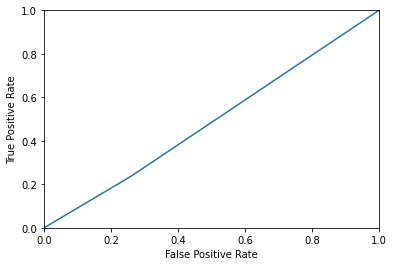

0.4886128364389234
-0.02627034687463669


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef

fpr , tpr , thresholds = roc_curve (test_labels,yPred)
plot_roc_curve (fpr,tpr)
auc_score=roc_auc_score(test_labels,yPred) 
print(auc_score) 
print(matthews_corrcoef(test_labels,yPred))